In [1]:
#General import
import numpy as np
from scipy.integrate import ode
from scipy.integrate import trapz
import matplotlib.pyplot as plt
import control
import control.matlab
#import seaborn as sns

In [2]:
#sns.set()

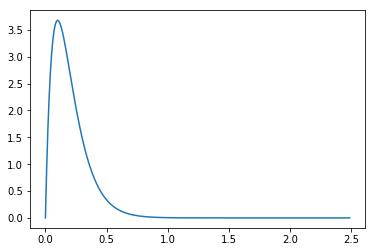

In [3]:
# Define a continuos-time power spectrum with bandwidth 10, and 
# standard deviation 3 (when filtered by white noise)

wu = 10 # bandwidth of the force disturbance
std_du = 3
Hu = control.TransferFunction([1], [1/wu, 1])
Hu = Hu * Hu
t_imp = np.arange(0,wu/4, 0.1/wu)
t, y = control.impulse_response(Hu,t_imp)
plt.plot(t,y)
std_tmp = np.sqrt(trapz(y**2,t))
Hu = Hu/(std_tmp)*std_du

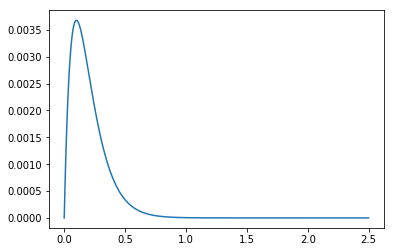

In [4]:
# Define a discrete-time power spectrum with sample time Ts = 1e-3, bandwidth 10 rad/sec, and 
# standard deviation 3 (when filtered by white noise)

wu = 10 # bandwidth of the force disturbance
std_du = 3
Ts = 1e-3
Hu = control.TransferFunction([1], [1/wu, 1])
Hu = Hu * Hu
Hud = control.matlab.c2d(Hu, Ts )
t_imp = np.arange(2500)*Ts
t, y = control.impulse_response(Hud,t_imp)
y = y[0]
plt.plot(t,y)
std_tmp = np.sqrt(np.sum(y**2))#np.sqrt(trapz(y**2,t))
Hu = Hu/(std_tmp)*std_du


2.6940445662402728

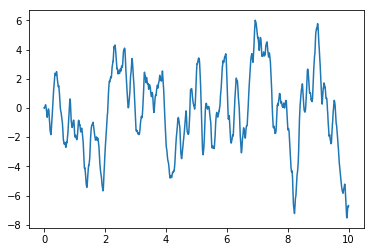

In [5]:
N_sim = 10000
e = np.random.randn(N_sim)
te = np.arange(N_sim) * Ts

_, d, _ = control.forced_response(Hu, te,e)
plt.plot(te,d)
np.std(d)

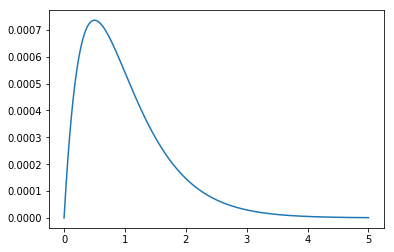

In [9]:
# Define a discrete-time power spectrum with sample time Ts = 1e-3, bandwidth 10 rad/sec, and 
# standard deviation 3 (when filtered by white noise)

wu = 2 # bandwidth of the force disturbance
std_du = 3
Ts = 1e-3
Hu = control.TransferFunction([1], [1/wu, 1])
Hu = Hu * Hu
Hud = control.matlab.c2d(Hu, Ts )
t_imp = np.arange(5000)*Ts
t, y = control.impulse_response(Hud,t_imp)
y = y[0]
plt.plot(t,y)
std_tmp = np.sqrt(np.sum(y**2))#np.sqrt(trapz(y**2,t))
Hu = Hu/(std_tmp)*std_du


3.391379569767212

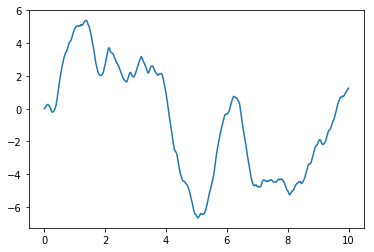

In [13]:
N_sim = 10000
e = np.random.randn(N_sim)
te = np.arange(N_sim) * Ts

_, d, _ = control.forced_response(Hu, te,e)
plt.plot(te,d)
np.std(d)